In [30]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Loading
df = pd.read_csv('movie_data.csv', encoding='ISO-8859-1')

In [31]:
#Preprocessing: Filling missing values with the mean 

#imputation

df.fillna(df.mean(numeric_only=True), inplace=True)

#Converting category data to numerical values using one-hot encoding
genres_dummies = df['genres'].str.get_dummies('|')
country_dummies = pd.get_dummies(df['country'], prefix='country')
language_dummies = pd.get_dummies(df['language'], prefix='language')

df = pd.concat([df, genres_dummies, country_dummies, language_dummies], axis=1)

#Drop non-numeric and unnecessary columns
df.drop(['genres', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 
         'actor_3_name', 'movie_imdb_link', 'country', 'language'], axis=1, inplace=True)


In [32]:
#Creating Model

#Splitting the dataset into features X and target variable y
X = df.drop('imdb_score', axis=1)
Y = df['imdb_score']

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Create the Linear regression model 
model = LinearRegression()

#Fit the model to the training data
model.fit(X_train, Y_train)

#Make predictions on the test data
Y_pred = model.predict(X_test)
Y_pred = np.clip(Y_pred, 0, 10)


In [33]:
#Model Evaluation


#Calculating the Mean Squared Error MSE for the model before filtering
mse = mean_squared_error(Y_test, Y_pred)

#Calculate the R-squared for the model before filtering
r2 = r2_score(Y_test, Y_pred)

#Calculate the RMSE for the model before filtering
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE) for Model before Filtering: {mse}")
print(f"R-squared (R2) for Model before Filtering: {r2}")
print(f"RMSE for Model before Filtering: {rmse}")


Mean Squared Error (MSE) for Model before Filtering: 0.8548678297293638
R-squared (R2) for Model before Filtering: 0.37594336683714136
RMSE for Model before Filtering: 0.9245906281859901


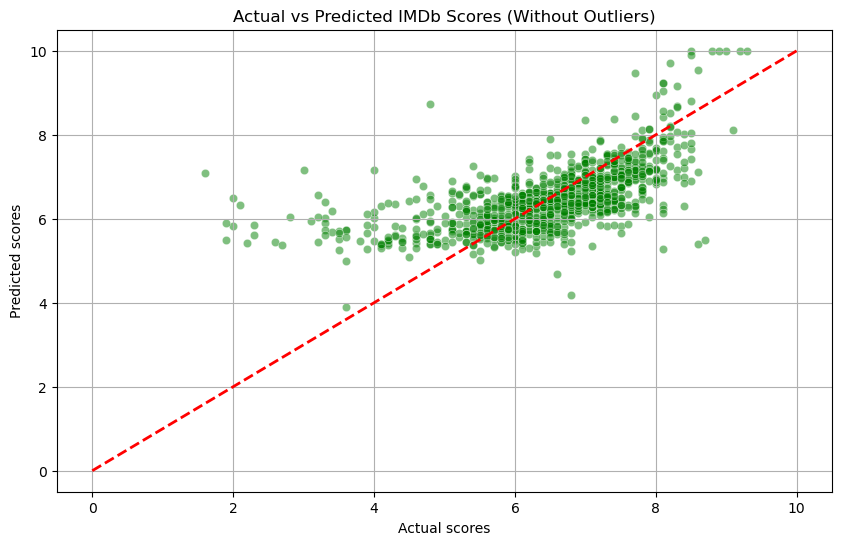

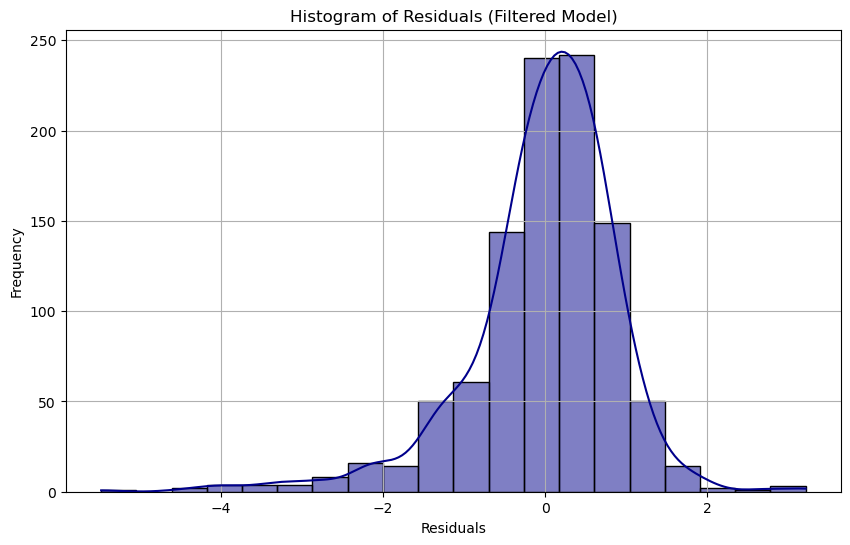

In [34]:

#Visualization


#Actual vs Predicted IMDB Scores Without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5, color='green')
sns.lineplot(x=[0, 10], y=[0, 10], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted IMDb Scores (Without Outliers)')
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.grid()
plt.show()

#Residuals for the filtered test set
residuals_filtered = Y_test - Y_pred

#Histogram of Residuals for the filtered model
plt.figure(figsize=(10, 6))
sns.histplot(residuals_filtered, bins=20, kde=True, color='darkblue', edgecolor='black')
plt.title('Histogram of Residuals (Filtered Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()